In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# sample weight and bias

In [ ]:
w_true = 2
b_true = 0.5

In [ ]:
x = np.linspace(0,3,100)

In [ ]:
y = w_true*x+b_true + np.random.randn(*x.shape) * 0.5

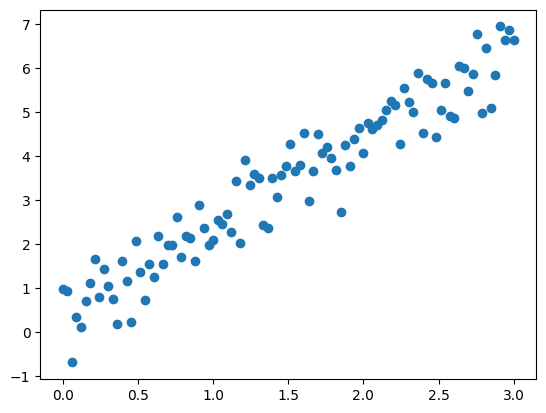

In [ ]:
plt.scatter(x,y)
plt.show()

In [ ]:
class LinearModel:

  def __init__(self):
    self.weight = tf.Variable(np.random.randn(), name='W')
    self.bias = tf.Variable(np.random.randn(), name='b')

  def __call__(self,x):
    return self.weight*x+self.bias

In [ ]:
def loss(y, y_pred):
  return tf.reduce_mean(tf.square(y-y_pred))

In [ ]:
def train(model, x, y, lr = 0.01):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    curr_loss = loss(y, y_pred)

  dw, db = tape.gradient(curr_loss, [model.weight, model.bias])
  model.weight.assign_sub(lr*dw)
  model.bias.assign_sub(lr*db)

In [ ]:
model = LinearModel()

In [ ]:
w,b = [], []
epochs = 10
lr = 0.15

In [ ]:
for cnt in range(epochs):
  w.append(model.weight.numpy())
  b.append(model.bias.numpy())
  ls = loss(y, model(x))
  train(model, x, y, lr)
  print(f"Epoch {cnt} loss: {ls}")

Epoch 0 loss: 0.40492552518844604
Epoch 1 loss: 0.3900638520717621
Epoch 2 loss: 0.37693700194358826
Epoch 3 loss: 0.365342378616333
Epoch 4 loss: 0.35510122776031494
Epoch 5 loss: 0.3460555970668793
Epoch 6 loss: 0.33806583285331726
Epoch 7 loss: 0.3310087323188782
Epoch 8 loss: 0.3247753977775574
Epoch 9 loss: 0.31926968693733215


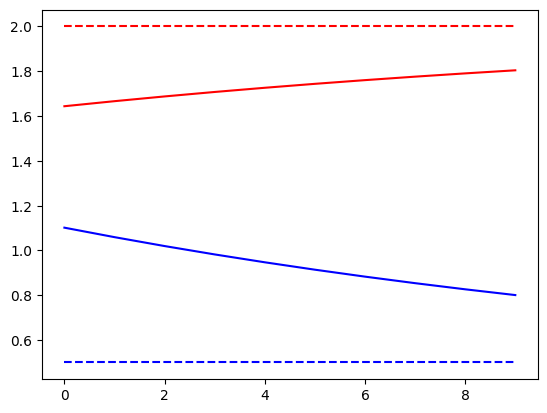

In [ ]:
plt.plot(range(epochs), w, 'r', range(epochs), b, 'b')
plt.plot([w_true]*epochs, 'r--', [b_true]*epochs, 'b--')

In [ ]:
print(model.weight, model.bias)

<tf.Variable 'W:0' shape=() dtype=float32, numpy=1.8172321> <tf.Variable 'b:0' shape=() dtype=float32, numpy=0.7767176>


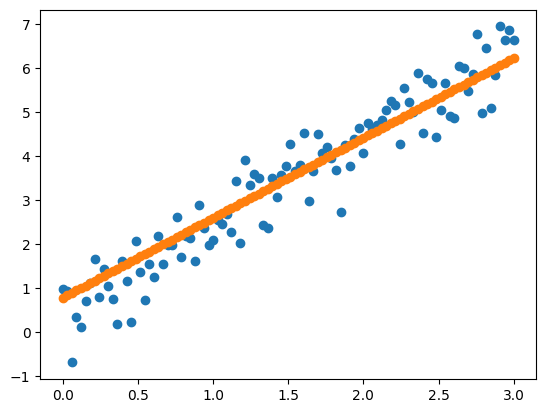

In [ ]:
plt.scatter(x,y, label='Original')
plt.scatter(x, model(x), label='Predicted')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
x = pd.DataFrame(x, columns=['x'])

In [ ]:
y = pd.DataFrame(y, columns=['x'])

In [ ]:
model = keras.Sequential([layers.Dense(1, input_shape=(1,), activation='linear')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model.compile(loss='mse', metrics=['mse'], optimizer=optimizer)

In [ ]:
model.fit(x,y,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 37.8013 - mse: 37.8013  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.0156 - mse: 37.0156  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.9879 - mse: 36.9879  
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.5879 - mse: 32.5879  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.6843 - mse: 33.6843 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.2982 - mse: 30.2982 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.3706 - mse: 28.3706 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.7119 - mse: 27.7119 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.6404 - mse: 25.6404 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3384 - mse: 24.3384 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.1981 - mse: 22.1981 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.8985 - mse: 19.8985 
Epoch 13/100
4/4 ━━━━

In [ ]:
y_pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


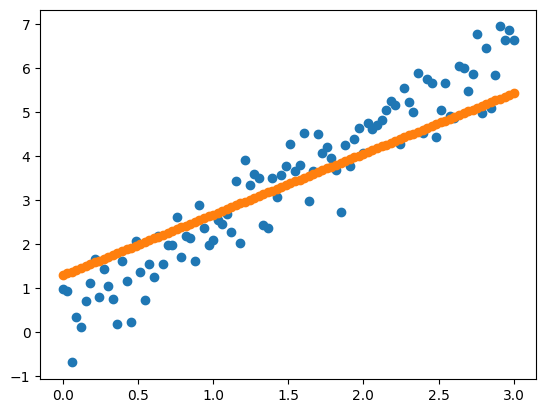

In [ ]:
plt.scatter(x,y,label='Actual')
plt.scatter(x,y_pred,label='Actual')

In [ ]:
for var in model.trainable_variables:
  print(var.name, var.numpy())

kernel [[1.38206]]
bias [1.2857095]
